In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
path = Path("crypto_data.csv")
df = pd.read_csv(path)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# filter to only get trading dfs
df_a = df[df.IsTrading == True]
# remove rows with null value
df_b = df_a.dropna()
# filter to get crypto that has been mined
df_c = df_b[df.TotalCoinsMined > 0]

# drop isTrading, CoinName and Unnamed columns
df_d = df_c.drop('IsTrading', axis=1)
df_e = df_d.drop('CoinName', axis=1)
df_f = df_e.drop('Unnamed: 0', axis=1)
# convert columns to numeric
df_dummies = pd.get_dummies(df_f, columns=['Algorithm', 'ProofType'])
df_dummies['TotalCoinSupply'] = pd.to_numeric(df_dummies.TotalCoinSupply)
df_dummies

/var/folders/_p/qcmk32610mn6ybq9lzlj5fdm0000gn/T/ipykernel_53638/3759059604.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_c = df_b[df.TotalCoinsMined > 0]


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# standardize data
scaler = StandardScaler().fit(df_dummies)
df_scaled = scaler.transform(df_dummies)

In [21]:
# use pca to reduce dimensions
# preserve 90% of expected variance
pca = PCA(n_components=0.90, random_state=42)
crypto_pca = pca.fit_transform(df_scaled)
# create df
df_crypto_pca = pd.DataFrame(data=crypto_pca)
# look at explained variance
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

PCA reduced from 98 to 74 columns

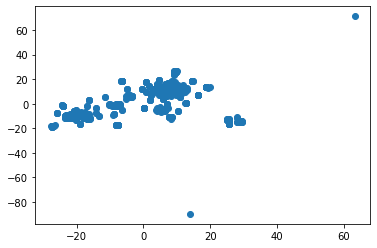

(532, 2)

In [24]:
# use tsne to further reduce dimensions
tsne = TSNE(random_state=42)
tsne_features = tsne.fit_transform(df_crypto_pca)
# inspect with scatter plot
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()
tsne_features.shape

t-SNE has reduced to two columns
Based on scatter plot, it looks like there could be 2 or 3 clusters.

    k        inertia
0   1  214372.078125
1   2  106558.031250
2   3   61756.933594
3   4   43476.625000
4   5   35385.824219
5   6   29221.091797
6   7   24928.119141
7   8   19438.328125
8   9   17216.976562
9  10   14023.498047


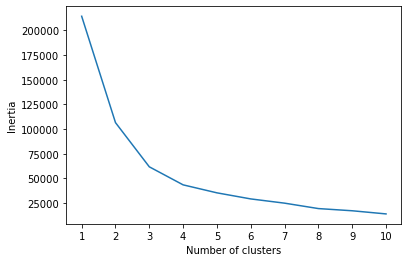

In [33]:
# Use K-Means to determine best number of clusters
inertia = []
k = list(range(1, 11))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    # using t-sne reduced data
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# create elbow plot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
print(df_elbow)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

It seems like the elbow on the K-Means graph is at 3 and there is only a marginal improvement from 3 -> 4. Therefore, 3 is the optimal number of clusters from K-Means. 

Based on my analysis of the data, cryptocurrencies can be clustered together following a reduction of the dataset to the principle components. The combination of the t-SNE scatter plot and K-means elbow graph indicates that the optimal number of clusters is 3. 